In [11]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt

from ana_classification import classify_image

In [2]:
files_aca = glob.glob('data/original/ACA/*')
files_neg = glob.glob('data/original/negatives/*')
files_hom = glob.glob('data/original/homogenous/*')
files_nuc = glob.glob('data/original/nucleolar/*')

In [3]:
%%time
result_aca = [classify_image(cv.imread(path)) for path in files_aca]

CPU times: user 5min 45s, sys: 807 ms, total: 5min 46s
Wall time: 4min 48s


In [4]:
%%time
result_neg = [classify_image(cv.imread(path)) for path in files_neg]

CPU times: user 2min 13s, sys: 172 ms, total: 2min 14s
Wall time: 37.5 s


In [5]:
%%time
result_hom = [classify_image(cv.imread(path)) for path in files_hom]

CPU times: user 6min 52s, sys: 468 ms, total: 6min 52s
Wall time: 5min 42s


In [6]:
%%time
result_nuc = [classify_image(cv.imread(path)) for path in files_nuc]

CPU times: user 1min 27s, sys: 71.8 ms, total: 1min 27s
Wall time: 1min 12s


In [8]:
x = ['ACA', 'NEG', 'HOM', 'NUC']
y_pos = [
    sum(res == 'ACA' for res in result_aca),
    sum(res == 'NEG' for res in result_neg),
    sum(res == 'HOM' for res in result_hom),
    sum(res == 'NUC' for res in result_nuc)
]
y_neg = [
    sum(res != 'ACA' for res in result_aca),
    sum(res != 'NEG' for res in result_neg),
    sum(res != 'HOM' for res in result_hom),
    sum(res != 'NUC' for res in result_nuc)
]

In [9]:
y_pos

[46, 180, 69, 14]

In [10]:
y_neg

[11, 0, 1, 2]

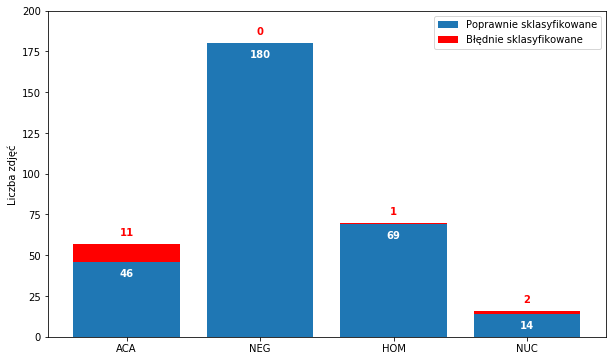

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(x, y_pos, label='Poprawnie sklasyfikowane')
plt.bar(x, y_neg, bottom=y_pos, color='r', label='Błędnie sklasyfikowane')
plt.ylim(0, 200)
plt.ylabel('Liczba zdjęć')
for i, (pos, neg) in enumerate(zip(y_pos, y_neg)):
    plt.text(i, pos-4, str(pos), color='w', fontweight='bold', horizontalalignment='center', verticalalignment='top')
    plt.text(i, pos+neg+4, str(neg), color='r', fontweight='bold', horizontalalignment='center', verticalalignment='bottom')
plt.legend()